# MNIST classification with feed forward neural network
In this notebook I'll build a simple neural network model with Tensorflow and Keras and use it to classify the classic MNIST dataset.

---
## 1. Imports and loading data
The dataset is loaded from Keras API. The function `load_data()` returns the data partitioned to train and test datasets by default.

In [1]:
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

---
## 2. Data exploration and modification
From the shapes of data we see that n = 70000 and it's split to train (n = 60000) and test (n = 10000) datasets.
The feature data are tensors with each single data point being a 28x28 matrix. Label data are 1D arrays.

In [2]:
print(f'x_train: {x_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_test: {y_test.shape}')

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


When looking at a single data point we can see that the feature matrix is a bunch of integers between 0 and 255. This is actually obvious since the features are grayscale images of digits!

Labels are just simply integers telling which digit the image is representing.

In [3]:
print(x_train[1])
print(y_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In machine learning, and in scientific computing in general, it's important to remove any biases affecting the outcome of the model. Sometimes different numerical scales in features can lead to one feature dominating the model. This is also true for feature data fed into a neural network.

The feature data is normalized here with a built-in function `normalize()`. In this case, we would've gotten the same result by dividing the data by 255. This way the feature data is normalized between 0 and 1.

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

With default settings in pyplots `imshow()` function the grayscale digit is plotted with 'viridis' colormap. By setting the colormap to 'binary' we can see the digit plotted as black-in-white text.

By printing the correct label we can verify that this is indeed a digit '0'.

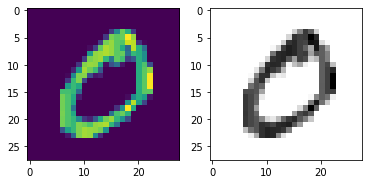

The correct label is: 0


In [5]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(x_train[1])
axs[1].imshow(x_train[1], cmap=plt.cm.binary)
plt.show()

print(f'The correct label is: {y_train[1]}')

---
## 3. Building and fitting the model
The model is very basic with no convolutions or dropouts, and only one hidden layer. 

The Sequential model is selected, which is a simple plain stack of single-input and single-output layers (feed forward network).

### Structure of the neural network
The input image gets flattened at the input layer to 784 (28x28) neurons and there is a single fully connected 256-neuron hidden layer with ReLU before the output layer. Output layer has 10 neurons, one for each digit, with softmax activation function. This outputs a probability distribution where each output value is in range(0, 1) and sum up to 1. The class with highest probability is the predicted value (digit).

The chosen optimizer implements the Adam algorithm, which is based on stochastic gradient descent method.

The sparse categorical crossentropy is selected as the loss function. Sparse is used because the labels aren't one-hot encoded.

The sparse categorical accuracy indicates how often the predicted label matches the true label.

In [6]:
NEURONS = 256
EPOCHS = 10

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(NEURONS, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
  
model.compile(
  optimizer='Adam',
  loss='sparse_categorical_crossentropy',
  metrics=['sparse_categorical_accuracy']
)

Training is logged with appropriate naming to differentiate models. Tensorboard can then be used to track how loss and accuracy changes with different models.

Tensorboard can be started from the command line with `tensorboard --logdir logs/fit`

In [12]:
import os

log_dir = os.path.join(
    "logs",
    "fit",
    f'FFNN-{NEURONS}-NEURONS-{EPOCHS}-EPOCHS-{datetime.now().strftime("%Y%m%d-%H%M%S")}',
)
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(
  x_train,
  y_train,
  epochs=EPOCHS,
  validation_data=(x_test, y_test),
  callbacks=[tensorboard_callback]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 336us/sample - loss: 0.2675 - sparse_categorical_accuracy: 0.9241 - val_loss: 0.1626 - val_sparse_categorical_accuracy: 0.9492
Epoch 2/10
60000/60000 [==============================] - 19s 315us/sample - loss: 0.1156 - sparse_categorical_accuracy: 0.9652 - val_loss: 0.1058 - val_sparse_categorical_accuracy: 0.9680
Epoch 3/10
60000/60000 [==============================] - 19s 321us/sample - loss: 0.0773 - sparse_categorical_accuracy: 0.9772 - val_loss: 0.0887 - val_sparse_categorical_accuracy: 0.9725
Epoch 4/10
60000/60000 [==============================] - 20s 341us/sample - loss: 0.0544 - sparse_categorical_accuracy: 0.9835 - val_loss: 0.0876 - val_sparse_categorical_accuracy: 0.9737
Epoch 5/10
60000/60000 [==============================] - 20s 338us/sample - loss: 0.0400 - sparse_categorical_accuracy: 0.9880 - val_loss: 0.0772 - val_sparse_categorical_accuracy: 0.9758
Epoch

![alt text](https://raw.githubusercontent.com/roouit/mnist-classification/master/accuracies.PNG "Accuracies from Tensorboard")

Here are three models with 64, 128 and 256 neurons in the hidden layer trained for 10 epochs.

The validation accuracies (blue and green colors) start to level off around 5 epochs, while training accuracies keep climbing (red colors) and overfitting data.

The models aren't optimized at all, but the accuracies with 128 and 256 neurons get quickly over 97% even with very simple structure.

---
## 4. Predicting with the model
A prediction gives 10 values in a range(0,1) and max value of these represents the class index, which model has predicted the digit to be.

We see that this digit 7 was correctly classified by the model.

[3.0704408e-11 3.4610685e-12 5.1625626e-10 1.2732695e-06 1.7175499e-17
 1.1502689e-12 2.4307475e-20 9.9999869e-01 1.2917901e-09 6.2972194e-10]


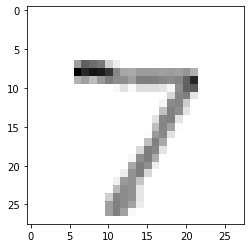

Correct label: 7
Predicted label: 7


In [13]:
predictions = model.predict(x_test)
print(predictions[0])

plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
print(f'Correct label: {y_test[0]}')
print(f'Predicted label: {np.argmax(predictions[0])}')

We can also take a look at some of the misclassified digits.

After visualizing few of these, it's clear that some of these would be hard for even a human being. However, this model could still be improved significantly because there are clear mistakes.

Incorrectly labelled digits: 251


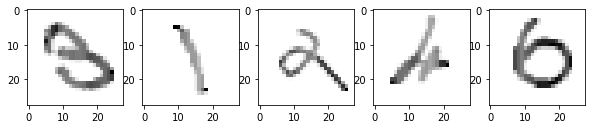

Correct labels: [3 1 2 4 6]
Predicted label: [8 9 9 2 0]


In [16]:
y_pred = np.argmax(predictions, axis=1)
mask = y_pred != y_test
print(f'Incorrectly labelled digits: {np.count_nonzero(mask)}')

incorrect_indeces = np.where(mask)
fig, axs = plt.subplots(1,5,figsize=(10,6))

axs[0].imshow(x_test[incorrect_indeces[0][0]], cmap=plt.cm.binary)
axs[1].imshow(x_test[incorrect_indeces[0][1]], cmap=plt.cm.binary)
axs[2].imshow(x_test[incorrect_indeces[0][2]], cmap=plt.cm.binary)
axs[3].imshow(x_test[incorrect_indeces[0][3]], cmap=plt.cm.binary)
axs[4].imshow(x_test[incorrect_indeces[0][4]], cmap=plt.cm.binary)
plt.show()

print(f'Correct labels: {y_test[incorrect_indeces[0][0:5]]}')
print(f'Predicted label: {y_pred[incorrect_indeces[0][0:5]]}')